In [1]:
import scanpy as sc
import schist as scs
import sklearn.metrics
import pandas as pd
%pylab
%matplotlib inline


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [24]:
mars = scs.io.read("MARS_reassigned")
quartz = scs.io.read("Quartz_reassigned")
x10 = scs.io.read("10XV3_075")

/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/graph_tool/inference/blockmodel.py:387: UserWarning: unrecognized keyword arguments: ['sampling']
  warnings.warn("unrecognized keyword arguments: " +


In [25]:
col_scheme = {'B cells': '#1f77b4',
 'CD4 T cells': '#ff7f0e',
 'CD8 T cells': '#279e68',
 'CD14+ Monocytes': '#d62728',
 'Dendritic cells': '#aa40fc',
 'FCGR3A+ Monocytes': '#8c564b',
 'HEK cells': '#e377c2',
 'NK cells': '#b5bd61',
 'Unknown': '#AABBCC'}

<ipython-input-63-af22f52bb3f7>:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


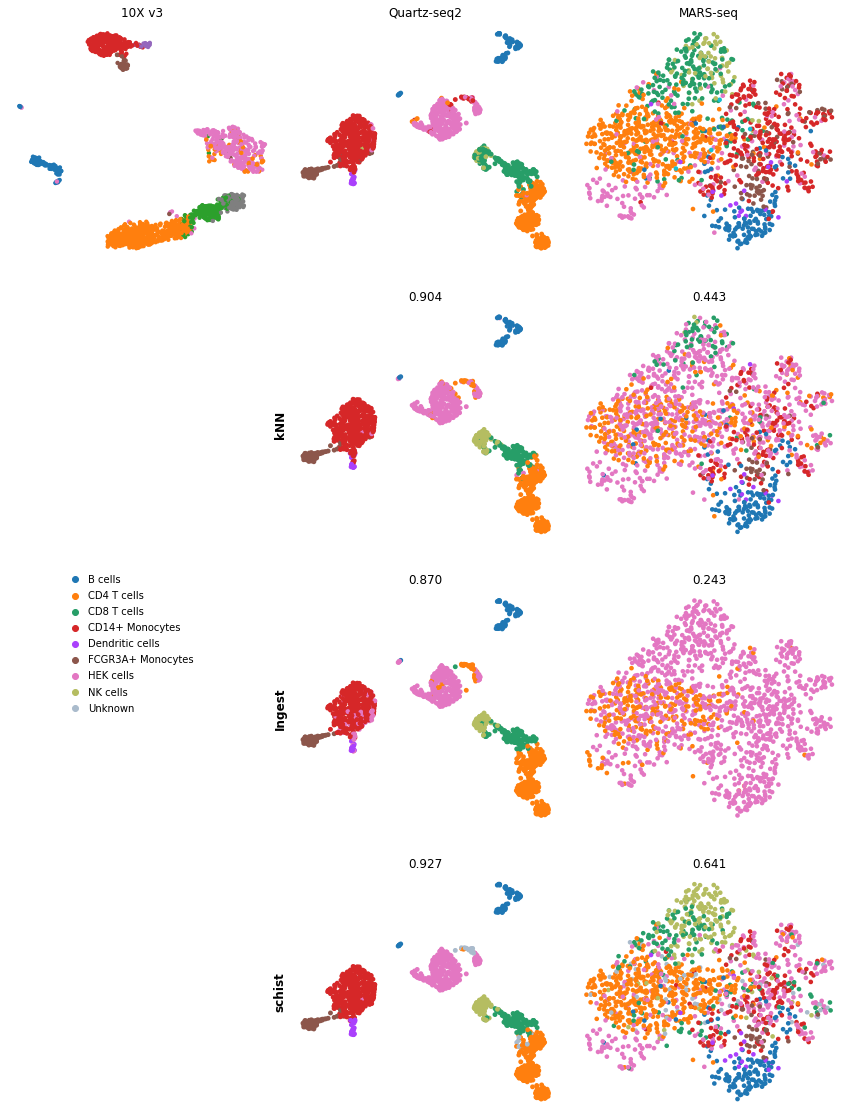

In [63]:
fig = plt.figure(constrained_layout=False, figsize=(15, 20))
gs = fig.add_gridspec(nrows=4, ncols=3, wspace=0.05)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

sc.pl.umap(x10, color='nnet2', legend_loc=None, 
           frameon=False, title='10X v3', show=False, ax=ax1)
sc.pl.umap(quartz, color='nnet2', legend_loc=None, 
           frameon=False, title='Quartz-seq2', show=False, ax=ax2)
sc.pl.umap(mars, color='nnet2', legend_loc=None,
           frameon=False, title='MARS-seq', show=False, ax=ax3)

ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
truth = quartz.obs.dropna()['nnet2'][quartz.obs['reassigned_knn'] != 'Unknown']
test = quartz.obs.dropna()['reassigned_knn'][quartz.obs['reassigned_knn'] != 'Unknown']
ACC = sklearn.metrics.accuracy_score(truth, test)
sc.pl.umap(quartz, color='reassigned_knn', legend_loc=None, 
           frameon=True, title=f'{ACC:.3f}', show=False, ax=ax5)
ax5.set_ylabel("kNN", fontsize='large', fontweight='bold')
ax5.set_xlabel("")
ax5.set_frame_on(False)

truth = mars.obs.dropna()['nnet2'][mars.obs['reassigned_knn'] != 'Unknown']
test = mars.obs.dropna()['reassigned_knn'][mars.obs['reassigned_knn'] != 'Unknown']
ACC = sklearn.metrics.accuracy_score(truth, test)
sc.pl.umap(mars, color='reassigned_knn', legend_loc=None,
           frameon=False, title=f'{ACC:.3f}', show=False, ax=ax6)
ax8 = fig.add_subplot(gs[2, 1])
ax9 = fig.add_subplot(gs[2, 2])
truth = quartz.obs.dropna()['nnet2'][quartz.obs['ingest'] != 'Unknown']
test = quartz.obs.dropna()['ingest'][quartz.obs['ingest'] != 'Unknown']
ACC = sklearn.metrics.accuracy_score(truth, test)

sc.pl.umap(quartz, color='ingest', legend_loc=None, 
           frameon=True, title=f'{ACC:.3f}', show=False, ax=ax8)
ax8.set_ylabel("Ingest", fontsize='large', fontweight='bold')
ax8.set_xlabel("")
ax8.set_frame_on(False)


truth = mars.obs.dropna()['nnet2'][mars.obs['ingest'] != 'Unknown']
test = mars.obs.dropna()['ingest'][mars.obs['ingest'] != 'Unknown']
ACC = sklearn.metrics.accuracy_score(truth, test)

sc.pl.umap(mars, color='ingest', legend_loc=None,
           frameon=False, title=f'{ACC:.3f}', show=False, ax=ax9)

ax11 = fig.add_subplot(gs[3, 1])
ax12 = fig.add_subplot(gs[3, 2])
truth = quartz.obs.dropna()['nnet2'][quartz.obs['reassigned_schist'] != 'Unknown']
test = quartz.obs.dropna()['reassigned_schist'][quartz.obs['reassigned_schist'] != 'Unknown']
ACC = sklearn.metrics.accuracy_score(truth, test)


sc.pl.umap(quartz, color='reassigned_schist', legend_loc=None, 
           frameon=True, title=f'{ACC:.3f}', show=False, ax=ax11)
ax11.set_ylabel("schist", fontsize='large', fontweight='bold')
ax11.set_xlabel("")
ax11.set_frame_on(False)


truth = mars.obs.dropna()['nnet2'][mars.obs['reassigned_schist'] != 'Unknown']
test = mars.obs.dropna()['reassigned_schist'][mars.obs['reassigned_schist'] != 'Unknown']
ACC = sklearn.metrics.accuracy_score(truth, test)


sc.pl.umap(mars, color='reassigned_schist', legend_loc=None,
           frameon=False, title=f'{ACC:.3f}', show=False, ax=ax12)


ax4 = fig.add_subplot(gs[1:, 0])
k = list(col_scheme.keys())[::-1]
for x in range(len(k)):
    ax4.scatter(0, x, c=col_scheme[k[x]], label=k[x])
    ax4.text(0.1, x, k[x], va='center', ha='left')
ax4.set_xlim(-.5, 1.5)    
ax4.set_ylim(-25, 25)
ax4.set_frame_on(False)
ax4.set_xticks([])
ax4.set_yticks([])
#ax4.set_xlim(1,2)    
#ax4.legend(loc='center right')
plt.tight_layout()
plt.show()
fig.savefig('Figure_Label_Transfer.pdf', dpi=300, transparent=True)

In [6]:
mars.obs

,nnet2,percent_mito,n_counts,n_genes,nsbm_level_0,nsbm_level_1,nsbm_level_2,nsbm_level_3,nsbm_level_4,nsbm_level_5,nsbm_level_6,nsbm_level_7,nsbm_level_8,nsbm_level_9,nsbm_level_10,nsbm_level_11,annotation,reassigned_schist,reassigned_knn,ingest
MARSseq_5920AA_AACAAT,CD4 T cells,0.028302,742.0,474,26,0,0,0,0,0,0,0,0,0,0,0,Unknown,CD4 T cells,HEK cells,HEK cells
MARSseq_5920AA_AACGCA,HEK cells,0.039683,504.0,331,2,6,1,0,0,0,0,0,0,0,0,0,Unknown,B cells,B cells,HEK cells
MARSseq_5920AA_AACTGG,CD14+ Monocytes,0.017264,3070.0,1983,36,6,1,0,0,0,0,0,0,0,0,0,Unknown,HEK cells,HEK cells,HEK cells
MARSseq_5920AA_AACTTG,CD14+ Monocytes,0.020077,4134.0,2364,3,2,1,0,0,0,0,0,0,0,0,0,Unknown,HEK cells,HEK cells,HEK cells
MARSseq_5920AA_AAGACA,CD14+ Monocytes,0.016941,4132.0,2552,3,2,1,0,0,0,0,0,0,0,0,0,Unknown,HEK cells,CD4 T cells,HEK cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MARSseq_5925AA_TTCAGG,CD14+ Monocytes,0.005498,4729.0,2933,56,12,1,0,0,0,0,0,0,0,0,0,Unknown,HEK cells,CD4 T cells,HEK cells
MARSseq_5925AA_TTCCGA,FCGR3A+ Monocytes,0.000728,4119.0,2771,56,12,1,0,0,0,0,0,0,0,0,0,Unknown,HEK cells,HEK cells,HEK cells
MARSseq_5925AA_TTGAAT,CD4 T cells,0.008122,985.0,634,17,8,0,0,0,0,0,0,0,0,0,0,Unknown,CD4 T cells,CD4 T cells,CD4 T cells
MARSseq_5925AA_TTGAGC,CD14+ Monocytes,0.010218,4991.0,3071,56,12,1,0,0,0,0,0,0,0,0,0,Unknown,CD4 T cells,CD4 T cells,HEK cells


In [ ]:
cell_ax=fig.add_subplot(gs[:2, :2])
schist_cl=fig.add_subplot(gs[0, 2])
schist_scaf=fig.add_subplot(gs[1, 2])
leiden_cl=fig.add_subplot(gs[0, 3])
leiden_scaf=fig.add_subplot(gs[1, 3])


sc.pl.umap(adata, color=['cell_line'], legend_loc='on data', 
           frameon=False,  title=['Cell line',], ax=cell_ax, show=False
           )
cell_ax.text(0, 1, 'A', size=32, transform=cell_ax.transAxes)

sc.pl.umap(adata, color='nsbm_level_1', legend_loc='on data', 
           frameon=False,  title='', ax=schist_cl, show=False
           )
schist_cl.text(0, 1, 'B', size=32, transform=schist_cl.transAxes)



sc.pl.umap(adata, color='leiden_level_1', legend_loc='on data', 
           frameon=False, title='', ax=leiden_cl, show=False)
leiden_cl.text(0, 1, 'C', size=32, transform=leiden_cl.transAxes)

sc.pl.umap(adata, color='NS1_result', legend_loc='on data', 
           frameon=False,  title='', ax=schist_scaf, show=False
           )
schist_scaf.text(0, 1, 'D', size=32, transform=schist_scaf.transAxes)

sc.pl.umap(adata, color='LE_result', legend_loc='on data', 
           frameon=False,  title='', ax=leiden_scaf, show=False
           )
leiden_scaf.text(0, 1, 'E', size=32, transform=leiden_scaf.transAxes)

plt.tight_layout()
plt.show()

fig.savefig('FigureTian.pdf', dpi=300, transparent=True)